# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
mouse_study_complete["Mouse ID"].nunique()

249

In [56]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_complete.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] != "g989"]
mouse_study_cleaned.reset_index(drop=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = mouse_study_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = mouse_study_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = mouse_study_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_stdev = mouse_study_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = mouse_study_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Build the DataFrame
data = {
    "Tumor Average": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor Variance": tumor_variance,
    "Tumor Standard Deviation": tumor_stdev,
    "Tumor SEM": tumor_sem,
}

# Create Leaderboard
leaderboard = pd.DataFrame(data).reset_index()
leaderboard

,Drug Regimen,Tumor Average,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen Counts'}, xlabel='Use Counts', ylabel='Drug Regimen'>

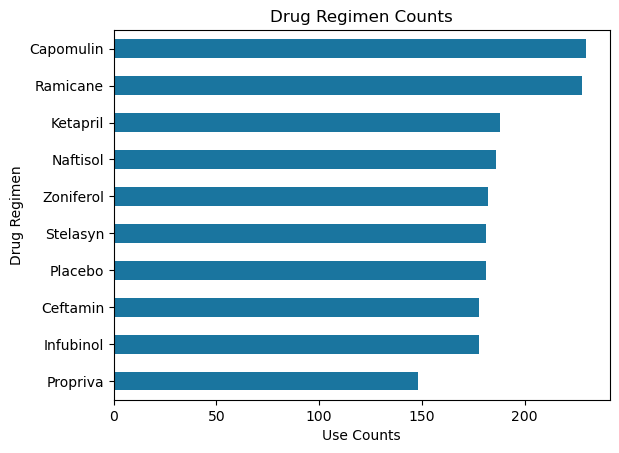

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_study_cleaned["Drug Regimen"].value_counts().sort_values().plot(kind="barh", xlabel="Use Counts", title="Drug Regimen Counts", color = "#1a759f")

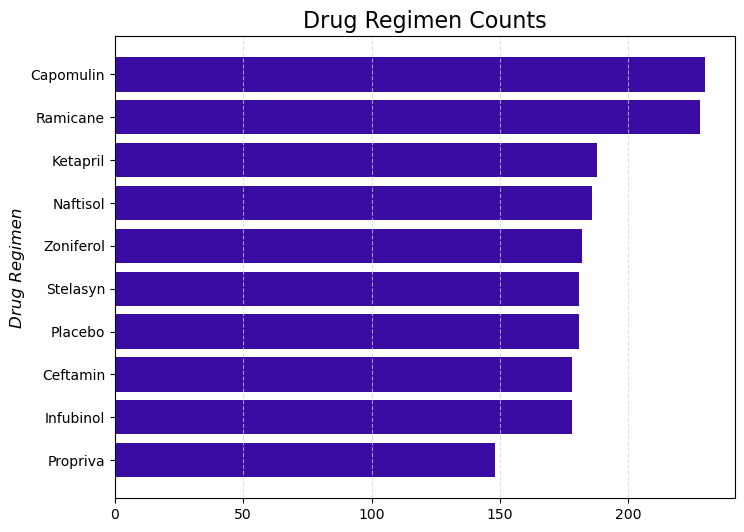

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

chart_data = mouse_study_cleaned["Drug Regimen"].value_counts().sort_values()

x = list(chart_data.index)
y = list(chart_data.values)

# Create canvas
plt.figure(figsize=(8,6))

# Create base plot
plt.barh(x, y, color = "#3a0ca3")

# Plot customization
plt.ylabel("Drug Regimen", fontsize=12, fontstyle="italic")
plt.title("Drug Regimen Counts", fontsize=16)
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.7)

plt.show()

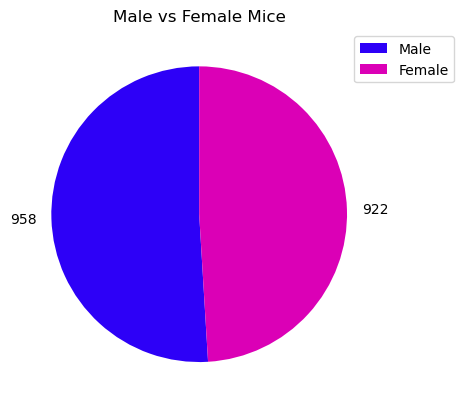

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = mouse_study_cleaned["Sex"].value_counts()
colors = ["#2d00f7", "#db00b6"]
labels = data

# Used Xpert to show mouse values on pie chart
panda_pie = data.plot(kind="pie", title="Male vs Female Mice", ylabel = "", labels=labels, colors=colors, startangle=90)


# Taken from Stackoverflow at https://stackoverflow.com/questions/68909283/how-to-customize-pandas-pie-plot-with-labels-and-legend
panda_pie.legend(["Male", "Female"], bbox_to_anchor=(.9, 1), loc='upper left')

plt.show()

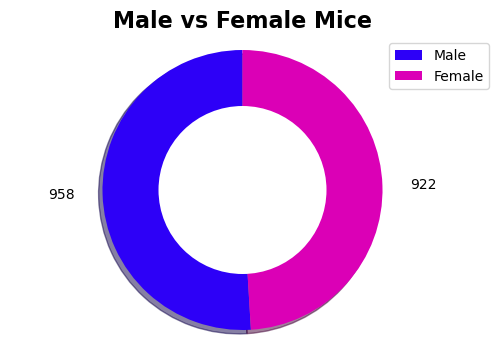

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create the canvas
plt.figure(figsize=(6, 4))

# Create base plot
colors = ["#2d00f7", "#db00b6"]
plt.pie(data, labels=labels, labeldistance=1.2, startangle=90, shadow=True, colors=colors)

# Add in the donut hole
center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Customizations
plt.title("Male vs Female Mice", fontweight="bold", fontsize=16)
plt.axis("equal")
plt.legend(["Male", "Female"], bbox_to_anchor=(.8, 1), loc='upper left')

plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get last (greatest) timepoint for each mouse
tumor_df = mouse_study_cleaned.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(tumor_df, mouse_study_cleaned, on=["Mouse ID", "Timepoint"])

# Isolate treatment regimens
treatments = tumor_vol_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
tumor_vol_df = tumor_vol_df.loc[treatments].reset_index(drop=True)

tumor_vol_df.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
7,a644,45,Ramicane,Female,7,17,32.978522,1
8,a685,45,Infubinol,Male,8,30,66.083066,3
9,b128,45,Capomulin,Female,9,22,38.982878,2


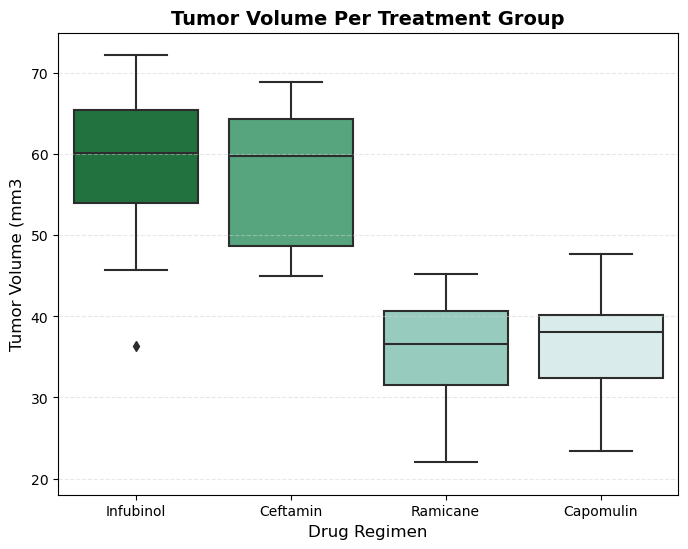

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create the canvas
plt.figure(figsize=(8, 6))

# Create base plot
sns.boxplot(data=tumor_vol_df, x="Drug Regimen", y="Tumor Volume (mm3)", palette="BuGn_r")

# Customize
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Tumor Volume (mm3", fontsize=12)
plt.title("Tumor Volume Per Treatment Group", fontsize=14, fontweight="bold")
plt.grid(axis="y", color="lightgrey", linestyle = "--", alpha=0.5)
plt.ylim(18, 75)

plt.show()

## Line and Scatter Plots

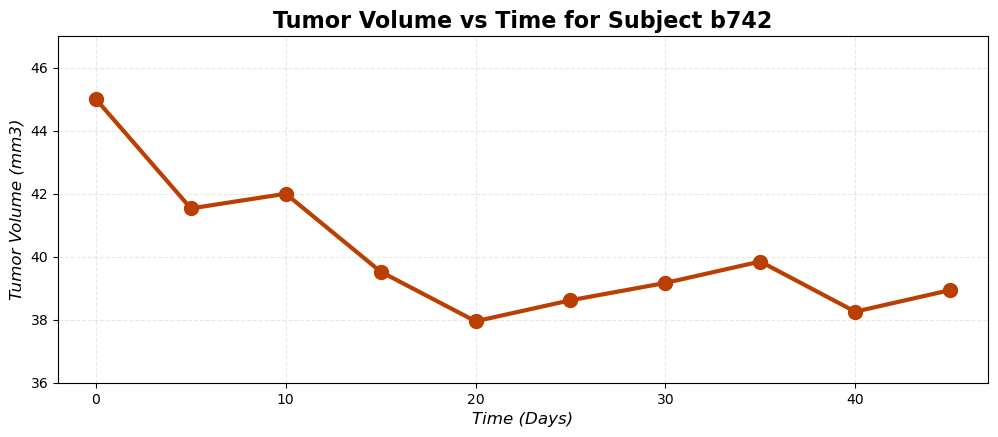

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]

mouse = "b742"

mouse_data = mouse_study_cleaned.loc[mouse_study_cleaned["Mouse ID"] == mouse]

x = mouse_data["Timepoint"]
y = mouse_data["Tumor Volume (mm3)"]

# Create canvas
plt.figure(figsize=(12,4.5))

# Create base plot
plt.plot(x, y, color= "#BB3E03", linewidth=3, marker="o", markersize=10)

# Customize
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)
plt.xlabel("Time (Days)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Tumor Volume vs Time for Subject b742", fontsize = 16, fontweight="bold")
plt.xlim(-2, 47)
plt.ylim(36, 47)

plt.show()

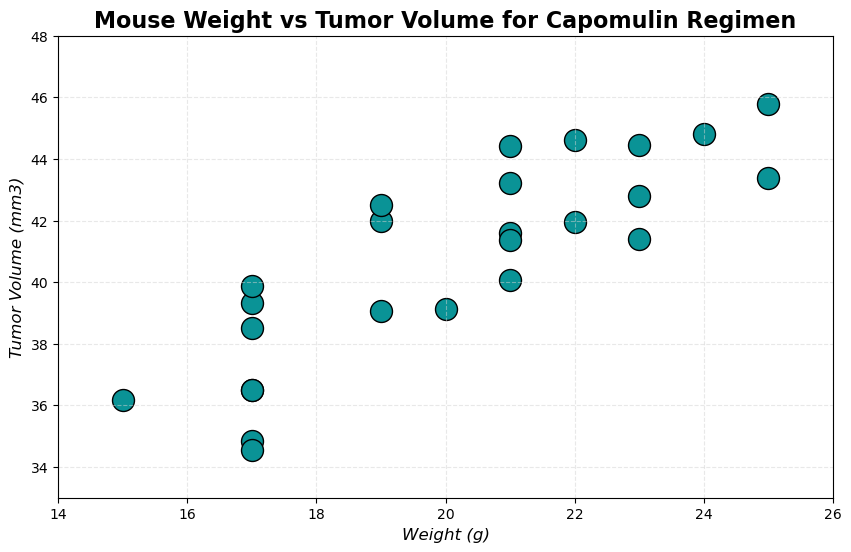

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]

capomulin_df = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

x = capomulin_df["Weight (g)"]
y = capomulin_df["Tumor Volume (mm3)"]

# Create canvas
plt.figure(figsize=(10,6))

# Create base plot
plt.scatter(x, y, facecolor="#0A9396", edgecolor="black", s=250)

# Customize
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Mouse Weight vs Tumor Volume for Capomulin Regimen", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.xlim(14, 26)
plt.ylim(33, 48)

plt.show()

## Correlation and Regression

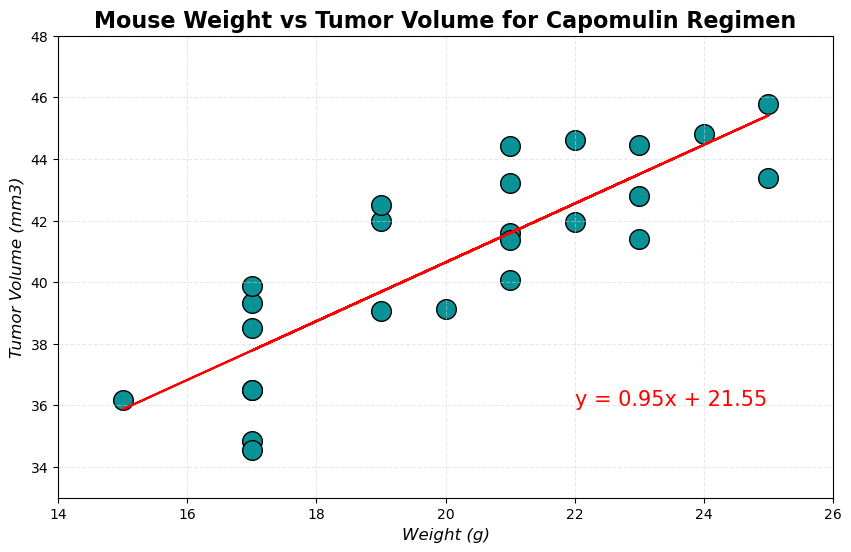

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]

# Line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate predictitons
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create canvas
plt.figure(figsize=(10,6))

# Create base plot
plt.scatter(x_values, y_values, facecolor="#0A9396", edgecolor="black", s=200)

# Plot line of best fit
plt.plot(x_values, regress_values, "red")

# Customize
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Mouse Weight vs Tumor Volume for Capomulin Regimen", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.xlim(14, 26)
plt.ylim(33, 48)
plt.annotate(line_eq,(22, 36),fontsize=15,color="red")

plt.show()